# Ford GoBike Data Exploration
## by Britney Lovett

## Investigation Overview

> Describe the overall goals of your presentation here. The intent of this presentation is to show the relationships between several variables in this dataset. Is there a correlation between age and gender? What is the average duration for a bike rental? Where are the most popular start and end stations? These are questions we would like to answer during this analysis.

## Dataset Overview

> Many cities have a bike sharing system to allow natives and visitors to roam the city freely without all the traffic buildup. San Francisco has a bike sharing system as described and this data is tracking individual rides around the area. The program is called GoBike and the bikes are manufactured by the company Ford, hence Ford GoBike. This dataset covers approximately 183K records.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
goBike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
goBike_clean = goBike.copy()

In [4]:
goBike_clean.start_time = pd.to_datetime(goBike_clean.start_time) #convert to datetime 
goBike_clean.end_time = pd.to_datetime(goBike_clean.end_time)

In [5]:
goBike_clean.start_station_id = goBike_clean.bike_id.astype(str) #convert to string
goBike_clean.end_station_id = goBike_clean.bike_id.astype(str)

In [6]:
goBike_clean.bike_id = goBike_clean.bike_id.astype(str) #convert to string

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Member Year Distribution

> Given that the Ford GoBike program started in June 2017 we shouldn't have many age values in the 1900s so it looks like we have some additional data to clean up. It's unlikely that so many people aged over age 100 rented bikes during this timeframe, but not impossible. You can see they are showing as outliers. San Francisco is a heavily populated area so it looks like the ages range on average from late 20s to late 30s.

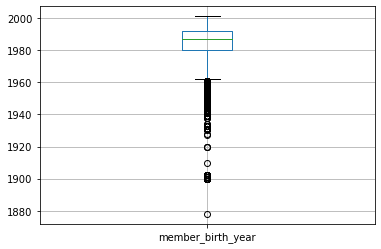

In [7]:
boxplot = goBike_clean.boxplot(column=['member_birth_year'])

## Rentals by Gender

> Overall, men rent a significant amount more than women (over 3x!). I wonder why that is? Could be lots of reasons including types of work around the city to safety reasons. That is not something I'll be able to dive into deeper today, but we can see the differences between returning customers (subscribers) and regular customers by gender. Are visitors more likely to be male or female that rent the bikes? We will explore this further later in the analysis.

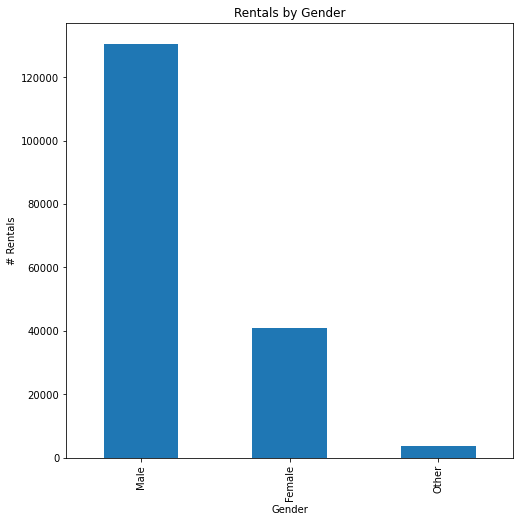

In [8]:
ax = goBike_clean['member_gender'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Rentals by Gender")

plt.xlabel('Gender')
plt.ylabel('# Rentals')
plt.show()

## Most Start and Stop Stations
>So from what we can see Market St at 10th Street and San Francisco Caltrain Station 2 are the most popular starting and ending locations.



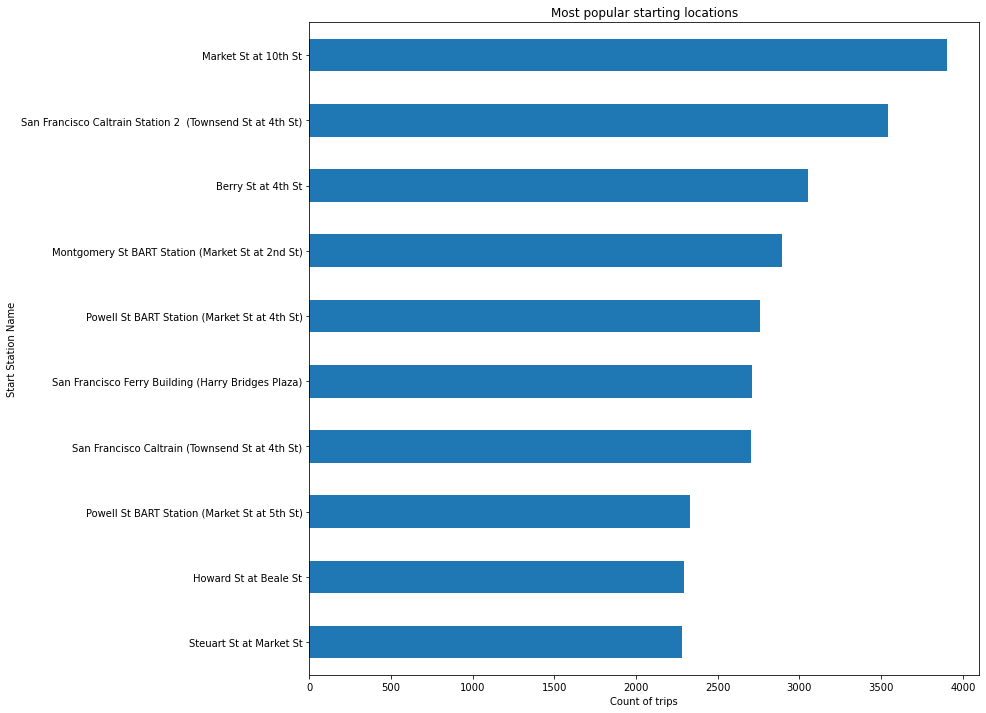

In [9]:
gb = goBike_clean['start_station_name'].value_counts().head(10).sort_values( ascending=True).plot(kind='barh',
                                    figsize=(12,12),
                                    title="Most popular starting locations")

plt.xlabel('Count of trips')
plt.ylabel('Start Station Name')
plt.show()

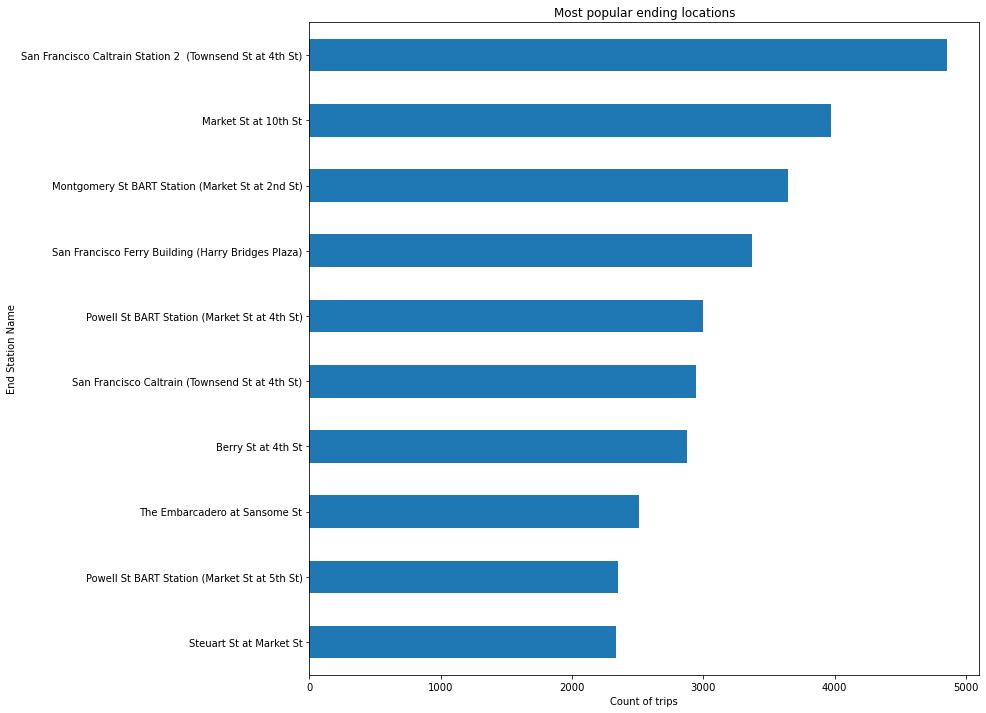

In [10]:
gb = goBike_clean['end_station_name'].value_counts().head(10).sort_values( ascending=True).plot(kind='barh',
                                    figsize=(12,12),
                                    title="Most popular ending locations")

plt.xlabel('Count of trips')
plt.ylabel('End Station Name')
plt.show()

## Trip Durations
>The below graph has what's known as a long-tailed distribution, which means most of the bike rides only last a short time. You can see as time or duration gets longer there is less data.

In [11]:
def myHistPlot(goBike_clean, xVar, bins=30, figsize=[14,6]):
    
    goBike_clean[xVar].hist(bins=bins,
                       grid=False,
                       edgecolor='black',
                        figsize=figsize);
    
    xVar=xVar.replace("_"," ")
    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight="bold")

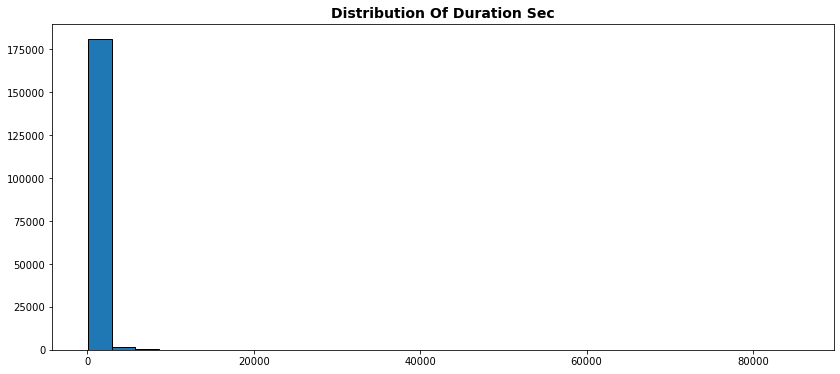

In [12]:
myHistPlot(goBike_clean,"duration_sec")

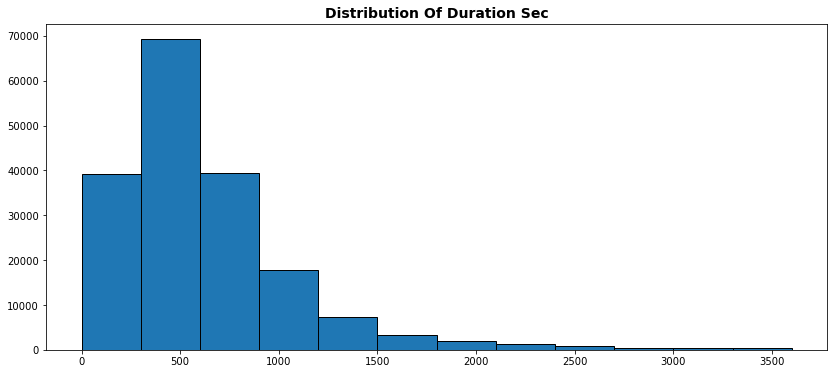

In [13]:
binsize=300
bin_edges=np.arange(0, goBike_clean['duration_sec'].quantile(0.99)+binsize,binsize)
myHistPlot(goBike_clean,"duration_sec", bins=bin_edges)

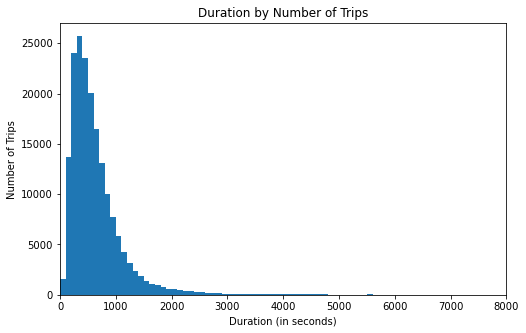

In [14]:
binsize=100
bin_edges=np.arange(0,goBike_clean['duration_sec'].max()+binsize,binsize)

plt.figure(figsize=[8,5])
plt.hist(data=goBike_clean,x='duration_sec',bins=bin_edges)
plt.xlabel('Duration (in seconds)')
plt.ylabel('Number of Trips')
plt.xlim(0,8000)
plt.title('Duration by Number of Trips')
plt.show()

## Relationship between age and duration
>I noticed as the values on the x-axis increase, the values on the y-axis increase indicating a positive relationship. In this case the younger the ages get the higher the duration.

Text(0.5, 1.0, 'Duration by Member Birth Year')

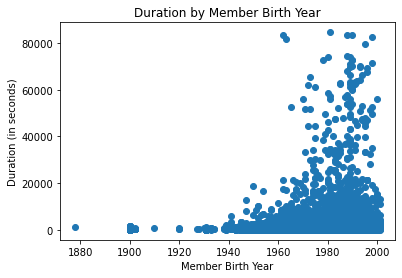

In [15]:
plt.scatter(data = goBike_clean, x = 'member_birth_year', y = 'duration_sec');
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (in seconds)')
plt.title("Duration by Member Birth Year")

## Avg Duration based on User Type
>Customers have a longer trip duration that subscribers possibly subscribers are doing less sight seeing, get lost less frequently and know where they want to go. Customers may be 1st timers and need a few extra minutes figuring it out in the beginning. A subscribers average time is 10 minutes whereas a customer is 15 minutes.

Text(0, 0.5, 'Duration (in seconds)')

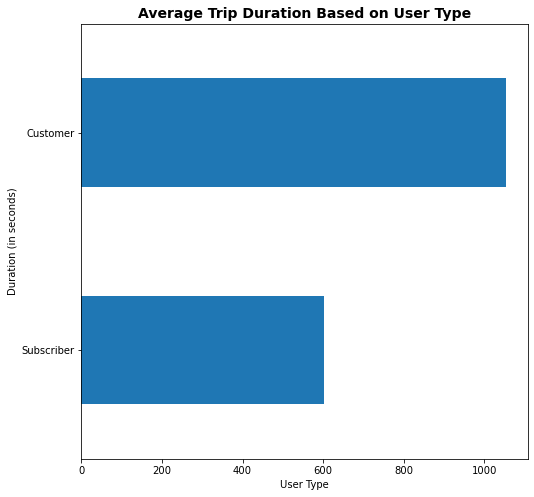

In [16]:
goBike_clean.query('duration_sec < 8000').groupby('user_type')['duration_sec'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))
plt.title('Average Trip Duration Based on User Type', fontsize=14, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration (in seconds)')

## Avg Duration based on Gender
>I was surprised to realize the average durations for females is slightly longer than males, only by a minute.

Text(0, 0.5, 'Duration (in seconds)')

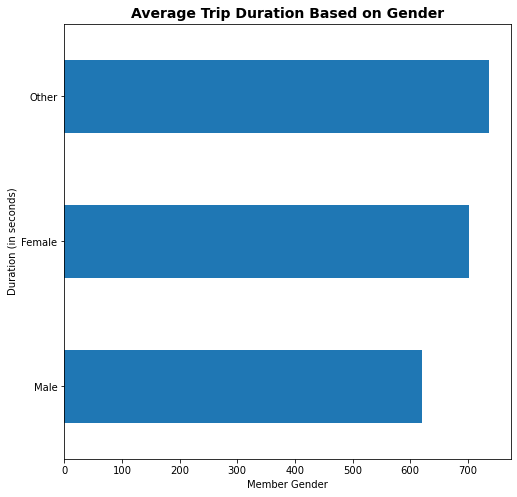

In [17]:
goBike_clean.query('duration_sec < 8000').groupby('member_gender')['duration_sec'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))
plt.title('Average Trip Duration Based on Gender', fontsize=14, fontweight='bold')
plt.xlabel('Member Gender')
plt.ylabel('Duration (in seconds)')

## Duration Count by Gender and Birth Year
>The relationships between gender, year, and duration are all consistent between what we have been discovering throughout this analysis. Females take less trips overall, there are also more male bike riders than female. The 'other' gender category is much smaller, but still representing a small group of durations.

<AxesSubplot:title={'center':'Count of durations of Rentals by Gender and Birth Year'}, xlabel='Member Birth Year', ylabel='Duration'>

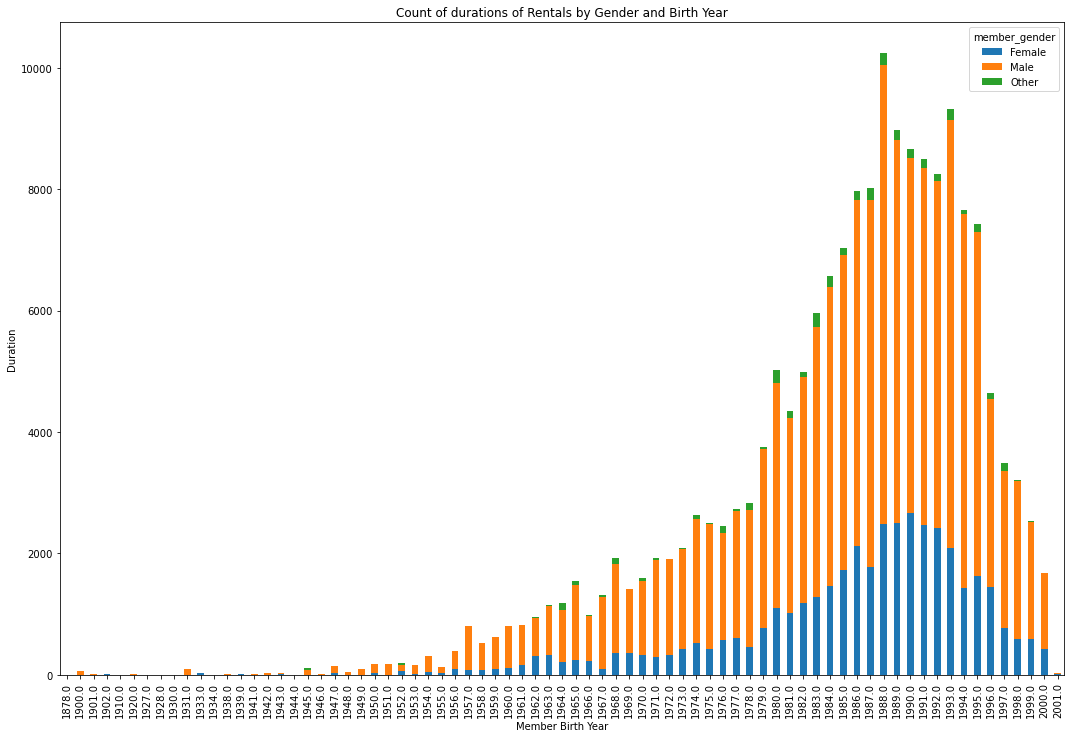

In [18]:
(goBike_clean.pivot_table(index='member_birth_year', columns='member_gender', values='duration_sec', aggfunc='count', fill_value=0)
.plot.bar(stacked=True, figsize=(18,12), ylabel = 'Duration', xlabel = 'Member Birth Year', title='Count of durations of Rentals by Gender and Birth Year')
 

)

# Relationships between Time, Gender, and Age

Looking at the below chart we can see the most popular days on average for trip durations are the weekends Saturdays and Sundays with Sunday being slightly longer.


The relationships between gender, year, and duration are all consistent between what we have been discovering throughout this analysis. Females take less trips overall, there are also more male bike riders than female. The 'other' gender category is much smaller, but still representing a small group of durations.

In [19]:
goBike_clean['duration_min']=goBike_clean['duration_sec']/60
goBike_clean['duration_hr']=goBike_clean['duration_min']/60
goBike_clean['duration_min']=goBike_clean['duration_min'].astype(float)
goBike_clean['duration_hr']=goBike_clean['duration_hr'].astype(float)


goBike_clean['start_month'] = goBike_clean.start_time.dt.month
goBike_clean['start_day'] = goBike_clean.start_time.dt.weekday 
goBike_clean['start_hour'] = goBike_clean.start_time.dt.hour

Text(0.5, 1.0, 'Mean Trip Duration by Day of Week')

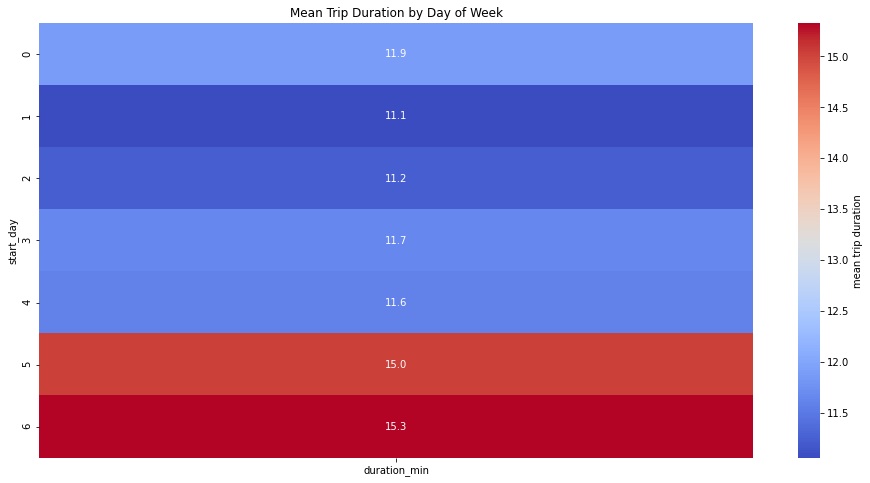

In [20]:
pivot = goBike_clean.pivot_table(values='duration_min', index='start_day')
plt.figure(figsize=(16,8))
sns.heatmap(pivot,annot=True,fmt='.1f',cbar_kws={'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week")

Text(0.5, 1.0, 'Mean Trip Duration by Day of Week by Gender')

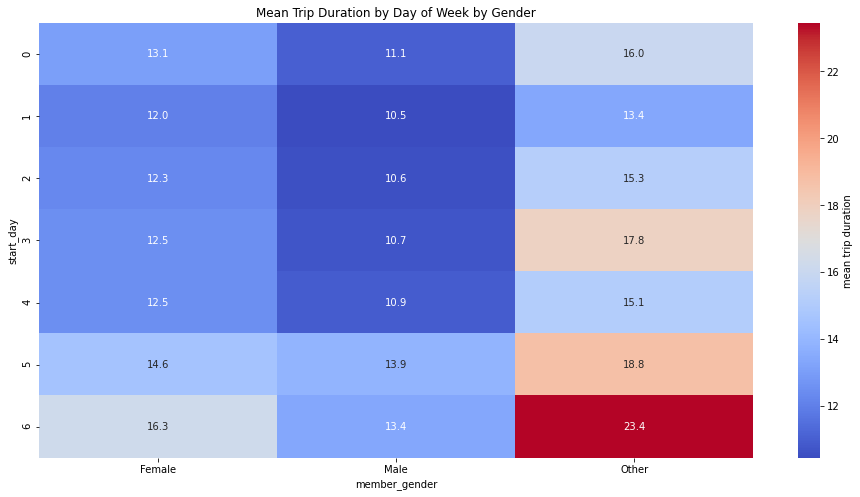

In [21]:
pivot = goBike_clean.pivot_table(values='duration_min', index='start_day', columns="member_gender")
plt.figure(figsize=(16,8))
sns.heatmap(pivot,annot=True,fmt='.1f',cbar_kws={'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week by Gender")

Text(0.5, 1.0, 'Mean Trip Duration by Day of Week by User Type')

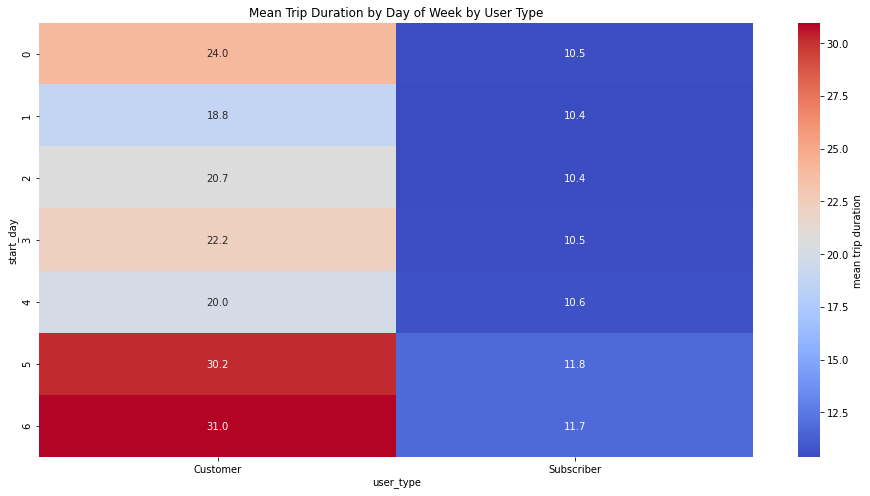

In [22]:
pivot = goBike_clean.pivot_table(values='duration_min', index='start_day', columns="user_type")
plt.figure(figsize=(16,8))
sns.heatmap(pivot,annot=True,fmt='.1f',cbar_kws={'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week by User Type")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [23]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 866764 bytes to slide_deck_template.slides.html
